In [1]:
#question 56

#using sklearn

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Load dataset
iris = load_iris()
X = iris.data

# Create agglomerative clustering model
clusterer = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fit the model and predict clusters
clusters = clusterer.fit_predict(X)

# Evaluate clustering
silhouette_avg = silhouette_score(X, clusters)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.5543236611296419


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
#question 57

from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load dataset
iris = load_iris()
X = iris.data

# Metrics to evaluate clustering
metrics = ['euclidean', 'manhattan', 'cosine']

for metric in metrics:
    print(f"\nClustering with {metric} distance metric:")

    # Create agglomerative clustering model
    clusterer = AgglomerativeClustering(n_clusters=3, affinity=metric, linkage='ward')

    # Fit the model and predict clusters
    clusters = clusterer.fit_predict(X)

    # Evaluate clustering using silhouette score
    silhouette_avg = silhouette_score(X, clusters)
    print("Silhouette Score:", silhouette_avg)

    # Evaluate clustering using Davies-Bouldin score
    davies_bouldin_avg = davies_bouldin_score(X, clusters)
    print("Davies-Bouldin Score:", davies_bouldin_avg)


In [7]:
#question 58

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Agglomerative clustering without structure
print("Agglomerative Clustering without Structure:")
clusterer_no_structure = AgglomerativeClustering(n_clusters=4, linkage='ward')
clusters_no_structure = clusterer_no_structure.fit_predict(X)
silhouette_avg_no_structure = silhouette_score(X, clusters_no_structure)
print("Silhouette Score:", silhouette_avg_no_structure)

# Agglomerative clustering with structure
print("\nAgglomerative Clustering with Structure:")
clusterer_with_structure = AgglomerativeClustering(n_clusters=None, distance_threshold=2, linkage='ward')
clusters_with_structure = clusterer_with_structure.fit_predict(X)
silhouette_avg_with_structure = silhouette_score(X, clusters_with_structure)
print("Silhouette Score:", silhouette_avg_with_structure)


Agglomerative Clustering without Structure:
Silhouette Score: 0.7915830011443039

Agglomerative Clustering with Structure:
Silhouette Score: 0.38232916551060964


In [ ]:
#question 59

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_checkerboard
from sklearn.cluster import AgglomerativeClustering

# Generate a sample checkerboard image
image = make_checkerboard(shape=(300, 300), n_clusters=5, noise=0.05, random_state=42)

# Convert the image to grayscale
gray_image = np.mean(image, axis=2)

# Reshape the image to 2D array
X = np.reshape(gray_image, (-1, 1))

# Perform hierarchical clustering with Ward linkage
clusterer = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = clusterer.fit_predict(X)

# Reshape the clustered labels to match the original image shape
segmented_image = np.reshape(clusters, gray_image.shape)

# Plot original and segmented images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(segmented_image, cmap='viridis')
axes[1].set_title('Segmented Image')
axes[1].axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


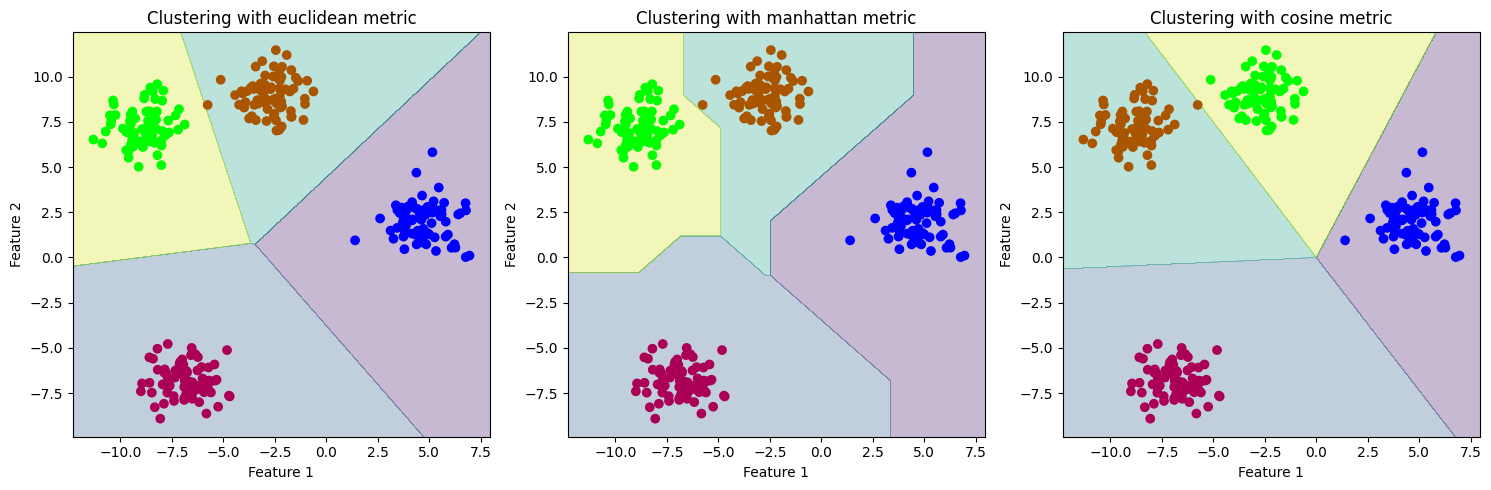

In [10]:
#question 60

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances_argmin

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Create a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Set the distance metrics to evaluate
metrics = ['euclidean', 'manhattan', 'cosine']
n_metrics = len(metrics)

# Create subplots to visualize clustering results for each metric
fig, axes = plt.subplots(1, n_metrics, figsize=(15, 5))

for i, metric in enumerate(metrics):
    # Perform agglomerative clustering
    clusterer = AgglomerativeClustering(n_clusters=4, affinity=metric, linkage='average')
    clusters = clusterer.fit_predict(X)

    # Find cluster centers for meshgrid visualization
    centers = pairwise_distances_argmin(np.array([xx.ravel(), yy.ravel()]).T,
                                         np.array([X[clusters == j].mean(axis=0) for j in range(4)]),
                                         metric=metric).reshape(xx.shape)

    # Plot clustering result
    axes[i].contourf(xx, yy, centers, alpha=0.3)
    axes[i].scatter(X[:, 0], X[:, 1], c=clusters, cmap=plt.cm.brg)
    axes[i].set_title(f'Clustering with {metric} metric')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
